(60000, 28, 28)
(10000, 28, 28)


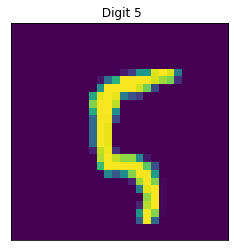

0 255


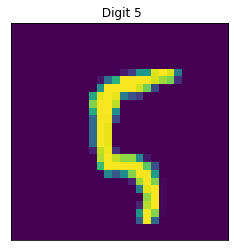

0.0 1.0


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    # helper functions
    def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

    def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

img_rows, img_cols = 28, 28  
num_classes = 10
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()
print(train_images.shape) 
print(test_images.shape)

train_images = train_images.reshape(train_images.shape[0],  img_rows, img_cols, 1) 
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100) 

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255
plot_image(train_images, 100, train_labels) 
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes) 
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

epochs=10
model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(20, activation='softplus'))
model.add(Dense(25, activation='softplus'))
model.add(Dense(30, activation='softplus'))
model.add(Dense(10, activation='softplus'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=epochs, shuffle=True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 20)                15700     
                                                                 
 dense_82 (Dense)            (None, 25)                525       
                                                                 
 dense_83 (Dense)            (None, 30)                780       
                                                                 
 dense_84 (Dense)            (None, 10)                310       
                                                                 
Total params: 17,315
Trainable params: 17,315
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [===========================

In [21]:
model.save('my_model.h5') 